# RL, Gymnasium, Q-Learning - Taxi-v3

https://gymnasium.farama.org/environments/toy_text/taxi/

# 1. Setup

In [1]:
from time import sleep
from IPython.display import clear_output

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gymnasium as gym

# 2. Environment Setup

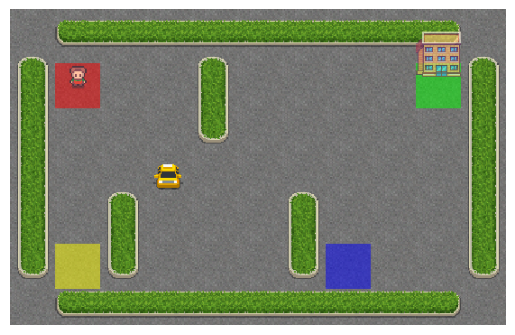

In [2]:
env = gym.make("Taxi-v3", render_mode='rgb_array').env

env.reset()
img = env.render()
plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
env = gym.make("Taxi-v3", render_mode ='ansi').env

In [4]:
env.reset()
print(env.render()[0])

+


In [5]:
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(6)
State Space Discrete(500)


In [6]:
env.reset()
state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
print(env.render()[0])

State: 328
+


/Users/martintomov/tensorflowtesting/env/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.encode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.encode` for environment variables or `env.get_wrapper_attr('encode')` that will search the reminding wrappers.
  logger.warn(


In [7]:
env.P[328]

/Users/martintomov/tensorflowtesting/env/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [8]:
env.s = 328  # set environment to illustration's state

epochs = 0
penalties, reward = 0, 0

frames = [] # for animation

done = False


while not done:
    action = env.action_space.sample()
    state, reward, done, truncated, info = env.step(action)

    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1
    
    
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 6358
Penalties incurred: 2125


In [9]:
def print_frames(frames, time_sleep = .1):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'][0])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(time_sleep)

In [10]:
print_frames(frames)

+
Timestep: 6358
State: 85
Action: 5
Reward: 20


# 3. Q-Learning Algorithm Implementation

In [11]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])

## Training the agent

Episode: 100000
Training finished.



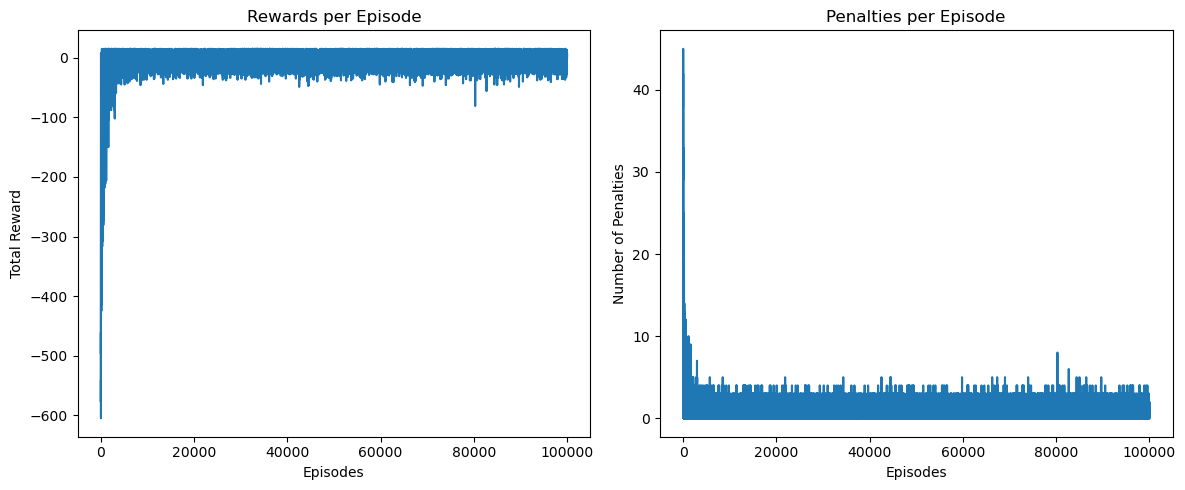

In [16]:
import random
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

# Initialize the environment
env = gym.make("Taxi-v3")

# Initialize Q-table
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []
all_rewards = []
all_penalties = []


# Training loop
for i in range(1, 100001):
    state = env.reset()
    if isinstance(state, tuple):
        state = state[0]

    epochs, penalties, reward = 0, 0, 0
    total_reward = 0
    done, terminated, truncated = False, False, False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, terminated, truncated, info = env.step(action) 
        total_reward += reward

        if isinstance(next_state, tuple):
            next_state = next_state[0]

        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1

        done = terminated or truncated
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

    all_rewards.append(total_reward)
    all_penalties.append(penalties)

print("Training finished.\n")

# Plotting the metrics
plt.figure(figsize=(12, 5))

# Subplot for rewards
plt.subplot(1, 2, 1)
plt.plot(all_rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Rewards per Episode')

# Subplot for penalties
plt.subplot(1, 2, 2)
plt.plot(all_penalties)
plt.xlabel('Episodes')
plt.ylabel('Number of Penalties')
plt.title('Penalties per Episode')

plt.tight_layout()
plt.show()

### Training Insights

Here's what I've learned from the training process of the Q-learning agent in the Taxi-v3 environment:

**Rewards per Episode:**
- Initially, the total reward per episode starts low but rapidly improves. This indicates that the agent quickly learns behaviors leading to better outcomes.
- The reward stabilizes near zero later on, suggesting the agent makes fewer mistakes and efficiently completes tasks with minimal unnecessary actions.

**Penalties per Episode:**
- At the start, there are many penalties, but these decrease sharply as training progresses. The agent learns to avoid actions resulting in penalties.
- Eventually, penalties become rare, indicating the agent rarely makes mistakes in later episodes.

### Training Conclusion

The training effectively taught the agent to navigate the Taxi-v3 environment. Initially experimenting with actions led to penalties, but as learning progressed, the agent optimized paths for successful episodes.

Overall, the agent minimizes penalties and improves rewards, demonstrating successful learning. Chosen hyperparameters and negative reinforcement effectively guided the agent to a good policy for the Taxi-v3 task.

In [17]:
q_table[328]

array([-2.40205889, -2.27325184, -2.40572344, -2.36126465, -9.59781064,
       -9.7603382 ])

## Post-training evaluation of the agent's performance

In [19]:
# Number of episodes for evaluation
evaluation_episodes = 100

# Initialize lists to store the total rewards and penalties for each evaluation episode
evaluation_rewards = []
evaluation_penalties = []

# Run the evaluation loop
for i in range(evaluation_episodes):
    # Reset the environment and get the initial state
    state = env.reset()
    if isinstance(state, tuple):
        state = state[0]
    
    epochs, penalties, reward = 0, 0, 0
    total_reward = 0
    terminated, truncated = False, False
    
    # Run the episode
    while not terminated and not truncated:
        # Choose action with highest Q-value for the current state
        action = np.argmax(q_table[state])
        # Step the environment
        next_state, reward, terminated, truncated, info = env.step(action)
        if isinstance(next_state, tuple):
            next_state = next_state[0]

        # Sum up the total reward and penalties
        total_reward += reward
        if reward == -10:
            penalties += 1
        
        # Go to next state
        state = next_state
        epochs += 1

    # Store the total reward and penalties for the episode
    evaluation_rewards.append(total_reward)
    evaluation_penalties.append(penalties)

    # print out the result
    if (i+1) % 10 == 0:
        print(f"Episode {i+1}: Total reward = {total_reward}, Total penalties = {penalties}")

# Calculate and print the average reward and penalties per episode
print(f"\nEvaluation results after {evaluation_episodes} episodes:")
print(f"Average reward per episode: {np.mean(evaluation_rewards)}")
print(f"Average penalties per episode: {np.mean(evaluation_penalties)}")


Episode 10: Total reward = 5, Total penalties = 0
Episode 20: Total reward = 5, Total penalties = 0
Episode 30: Total reward = 10, Total penalties = 0
Episode 40: Total reward = 6, Total penalties = 0
Episode 50: Total reward = 6, Total penalties = 0
Episode 60: Total reward = 8, Total penalties = 0
Episode 70: Total reward = 7, Total penalties = 0
Episode 80: Total reward = 8, Total penalties = 0
Episode 90: Total reward = 9, Total penalties = 0
Episode 100: Total reward = 7, Total penalties = 0

Evaluation results after 100 episodes:
Average reward per episode: 7.84
Average penalties per episode: 0.0


### Conclusion

Here's what I found after evaluating the agent's performance:

- **Consistent Success**: The agent consistently earns positive rewards in all episodes, averaging 7.84 per episode. This indicates effective learning in navigating the Taxi environment and delivering passengers to their destinations.

- **Zero Penalties**: Throughout all episodes, the agent incurs no penalties, showing it makes correct and legal moves within the environment's rules.

- **Reliable Performance**: The agent's consistent positive rewards and absence of penalties demonstrate the robustness of its learned policy.

- **Fluctuating Rewards**: The variation in total reward across episodes (from 5 to 10) is due to differences in starting states and passenger destinations.

- **High Average Reward**: With an average reward of 7.84, the agent efficiently minimizes the number of steps required for each trip, leading to high overall rewards.

In conclusion, the agent has effectively learned to navigate the Taxi-v3 environment, picking up and dropping off passengers efficiently and without errors. The training process and selected hyperparameters have resulted in a strong policy that performs well across various scenarios during evaluation episodes.